## Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
%matplotlib inline

# Data Preparation

In [4]:
lc_data = pd.read_csv('/content/drive/MyDrive/DS5500_Capstone_Phase_2/lc_2016_2017.csv')
lc_data.head(10)

<ipython-input-4-e1f0d3eabca1>:1: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  lc_data = pd.read_csv('/content/drive/MyDrive/DS5500_Capstone_Phase_2/lc_2016_2017.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.00,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.990000,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.00,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.090000,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.00,Not Verified,Jun-2017,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-2002,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.460000,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-2017,209.01,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.00,Source Verified,Jun-2017,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-2007,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.800000,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-2017,652.91,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.00,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-2002,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.000000,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-2017,431.73,Jan-2018,Dec-2017,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0
5,112230200,NaN,12000,12000,12000.0,36 months,9.44,384.06,B,B1,Teacher,10+ years,MORTGAGE,70000.00,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,184xx,PA,18.34,0,Aug-1997,0.0,35.0,83.0,14,1,15025.0,58.2,30,w,10528.73,10528.73,1904.570000,1904.57,1471.27,433.30,0.0,0.0,0.0,Dec-2017,384.06,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,211227.0,0.0,0.0,0.0,41.0,12438.0,40.0,2.0,3.0,5227.0,49.0,25800.0,0.0,0.0,2.0
6,112210041,NaN,6000,6000,6000.0,36 months,10.42,194.79,B,B3,Office Clerk,7 years,MORTGAGE,37107.19,Source Verified,Jun-2017,Current,n,NaN,medical,Medical expenses,773xx,TX,30.63,0,Mar-1992,0.0,70.0,71.0,10,1,9332.0,59.1,28,w,5274.05,5274.05,965.270000,965.27,725.95,239.32,0.0,0.0,0.0,Dec-2017,194.79,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,275.0,107517.0,0.0,0.0,1.0,19.0,19983.0,NaN,1.0,1.0,3990.0,59.0,15800.0,0.0,0.0,0.0
7

## Data Cleaning

In [5]:
lc_data=lc_data.drop(['id','member_id','desc','pymnt_plan','addr_state','funded_amnt','funded_amnt_inv',
'mths_since_last_delinq','mths_since_last_record','initial_list_status','out_prncp_inv',
'total_pymnt_inv','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq',
'open_acc_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','il_util','open_rv_12m',
'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl',
'inq_last_12m','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
'collections_12_mths_ex_med','mths_since_last_major_derog','policy_code',
'recoveries','collection_recovery_fee','earliest_cr_line','delinq_2yrs','inq_last_6mths',
'out_prncp','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee'],axis=1)

In [6]:
lc_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,tot_coll_amt,tot_cur_bal,total_bal_il
0,2300,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,credit_card,Credit card refinancing,148xx,21.61,4,0,3911.0,55.1,6,Individual,0.0,3911.0,0.0
1,16000,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,debt_consolidation,Debt consolidation,021xx,25.61,9,0,33752.0,105.8,26,Individual,0.0,234457.0,11078.0
2,6025,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-2017,Current,home_improvement,Home improvement,018xx,8.88,11,0,12425.0,44.9,27,Individual,0.0,121311.0,0.0
3,20400,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-2017,Current,car,Car financing,913xx,27.06,15,0,8769.0,18.7,19,Individual,0.0,62335.0,53566.0
4,13000,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-2017,Current,debt_consolidation,Debt consolidation,560xx,6.79,5,0,6866.0,88.0,24,Individual,0.0,15332.0,8466.0


Removing/Imputing NA values- We have handled the NA values in the later stages of the code

In [7]:
lc_data.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title              50970
emp_length             50363
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                  23173
zip_code                   1
dti                      355
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               517
total_acc                  0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_bal_il              61
dtype: int64

In [8]:
lc_data['emp_title']=lc_data['emp_title'].fillna("Unknown")

In [9]:
#Analyze Categorical Variables
categorical = lc_data.dtypes[lc_data.dtypes=="object"].index

lc_data[categorical].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,application_type
count,759338,759338,759338,759338,708975,759338,759338,759338,759338,759338,736165,759337,759338
unique,2,7,35,173023,11,5,3,21,7,13,13,919,2
top,36 months,C,C1,Unknown,10+ years,MORTGAGE,Source Verified,Mar-2016,Current,debt_consolidation,Debt consolidation,750xx,Individual
freq,561237,244903,56831,50970,257944,371579,298669,61992,565523,431530,417193,7986,725335


<Axes: xlabel='loan_status', ylabel='count'>

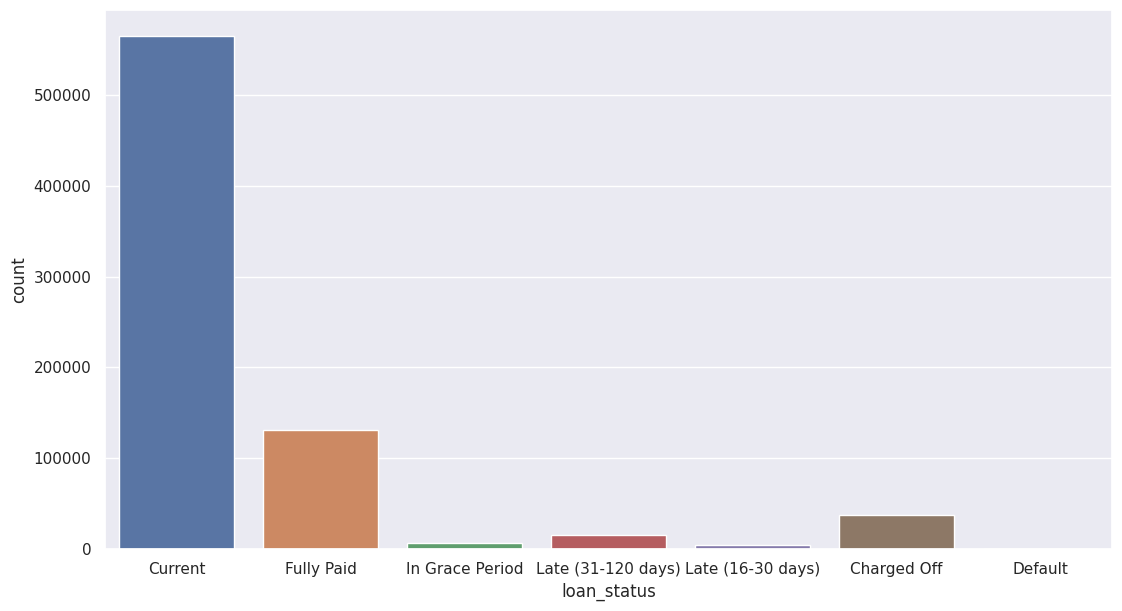

In [10]:
#Our Target Variable is Loan_Status
#Let's take a count of this variable
sns.set(rc = {'figure.figsize':(13,7)})
sns.countplot(x ='loan_status', data = lc_data )

In [11]:
lc_data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,37197.0,15690.263328,9174.795928,1000.0,8250.00,14250.0,21000.0,40000.0
Current,565523.0,14691.880260,9233.212431,1000.0,7500.00,12000.0,20000.0,40000.0
Default,36.0,14906.944444,9061.982224,1400.0,9081.25,13800.0,20000.0,40000.0
Fully Paid,130718.0,14266.351229,9085.739786,1000.0,7000.00,12000.0,20000.0,40000.0
In Grace Period,6634.0,16470.296955,9463.834696,1000.0,9075.00,15000.0,23100.0,40000.0
Late (16-30 days),3876.0,16011.880805,9427.000914,1000.0,8500.00,14962.5,21662.5,40000.0
Late (31-120 days),15354.0,15579.925427,9240.279424,1000.0,8000.00,14000.0,21000.0,40000.0


In [12]:
#Let's merge Loan status into two Categories: 1) default 2) paid  
def merge_status(row):
    if row['loan_status'] == 'Current':
        return 'paid'
    elif row['loan_status'] =='Fully Paid':
        return 'paid' 
    elif row['loan_status'] =='In Grace Period':
        return 'paid' 
    else:
        return 'default'

In [13]:
#Call the merge_status function
lc_data['loan_default'] = lc_data.apply(merge_status, axis=1) 

In [14]:
lc_data.groupby(['loan_status','loan_default']).size().reset_index().rename(columns={0:'count'})

,loan_status,loan_default,count
0,Charged Off,default,37197
1,Current,paid,565523
2,Default,default,36
3,Fully Paid,paid,130718
4,In Grace Period,paid,6634
5,Late (16-30 days),default,3876
6,Late (31-120 days),default,15354


<Axes: xlabel='loan_default', ylabel='count'>

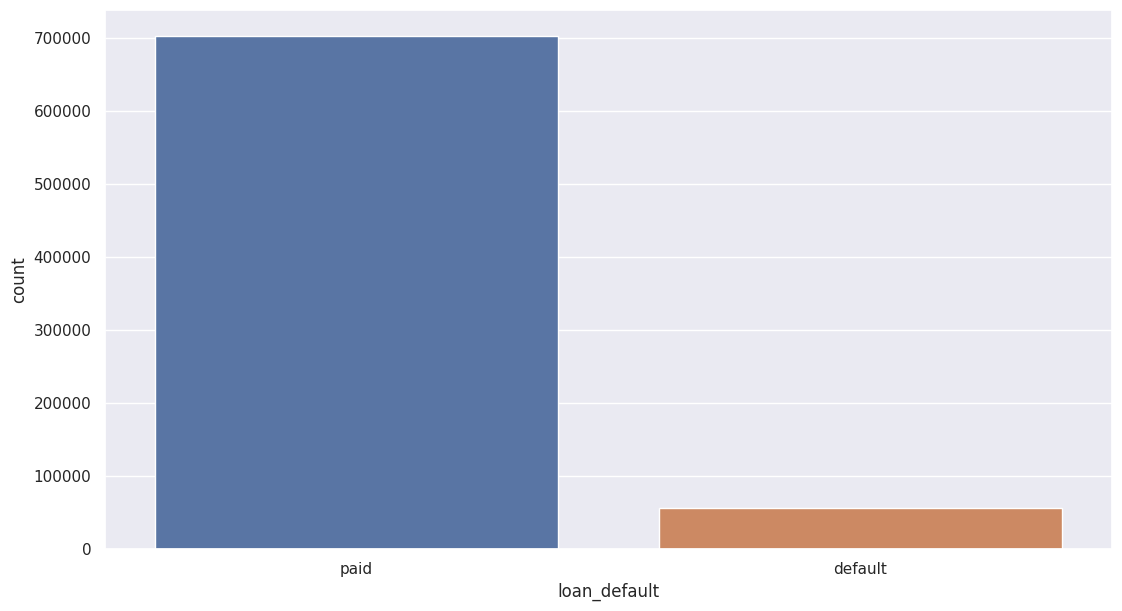

In [15]:
#Our Target Variable is Loan_default
#Let's take a count of this variable
sns.countplot(x='loan_default', data=lc_data )

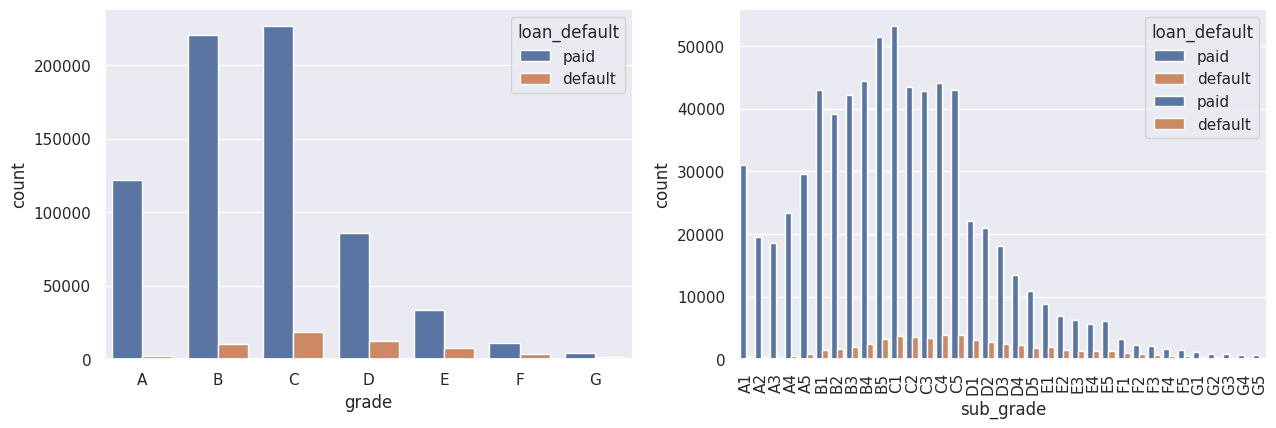

In [16]:
#Visualize the Loan Default by different Loan Grade and Subgrade
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(lc_data.grade.unique().tolist())
sns.countplot(x='grade', data=lc_data, hue='loan_default', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(lc_data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc_data, hue='loan_default', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

#As expected lower quality grade tend to have lower number of loans sanctioned and higher number of default rates.
plt.subplot(2, 2, 2)
sub_grade = sorted(lc_data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc_data, hue='loan_default', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [17]:
lc_mod1 = lc_data.groupby(['sub_grade', 'loan_default']).count().reset_index(level='loan_default')
lc22 = lc_mod1[['loan_default', 'loan_status']]
lc22 = lc22.astype({'loan_status':'int'})

In [18]:
percentage=[]
i=0
while i<=(lc22.shape[0]-1):
  percentage.append(lc22.iloc[i][1] / (lc22.iloc[i][1] + lc22.iloc[i+1][1]))
  i += 2

percentage

[0.01141945773524721,
 0.01747054677273185,
 0.02045358202628232,
 0.025688150035503947,
 0.02767939131575495,
 0.0326167698368036,
 0.038939967550027044,
 0.043992848899047275,
 0.05289302008271863,
 0.05883645552930836,
 0.06420791469444494,
 0.07664668112429307,
 0.07392356908179146,
 0.08154837633220013,
 0.08360561214683836,
 0.12144795657726692,
 0.11792175010517458,
 0.11865559279226771,
 0.14735837046467218,
 0.14501675368191383,
 0.17813233223838573,
 0.18148670900964478,
 0.17983367983367984,
 0.1900610287707062,
 0.17595424923527064,
 0.23544784984556902,
 0.25318066157760816,
 0.23385625684056913,
 0.2626172398392139,
 0.2661409561360276,
 0.22782258064516128,
 0.2682291666666667,
 0.21782178217821782,
 0.22567287784679088,
 0.19543973941368079]

In [19]:
lc22 = lc22.reset_index(level='sub_grade')

subgrade = lc22['sub_grade'].unique()
final = pd.DataFrame(subgrade, percentage)
final = final.reset_index()
final['index'] = final['index']*100

In [20]:
final = final.sort_values(by='index', ascending=True)
final

,index,0
0,1.141946,A1
1,1.747055,A2
2,2.045358,A3
3,2.568815,A4
4,2.767939,A5
5,3.261677,B1
6,3.893997,B2
7,4.399285,B3
8,5.289302,B4
9,5.883646,B5


[Text(0.5, 0, 'Sub Grades'), Text(0, 0.5, 'Percentage of Defaulters')]

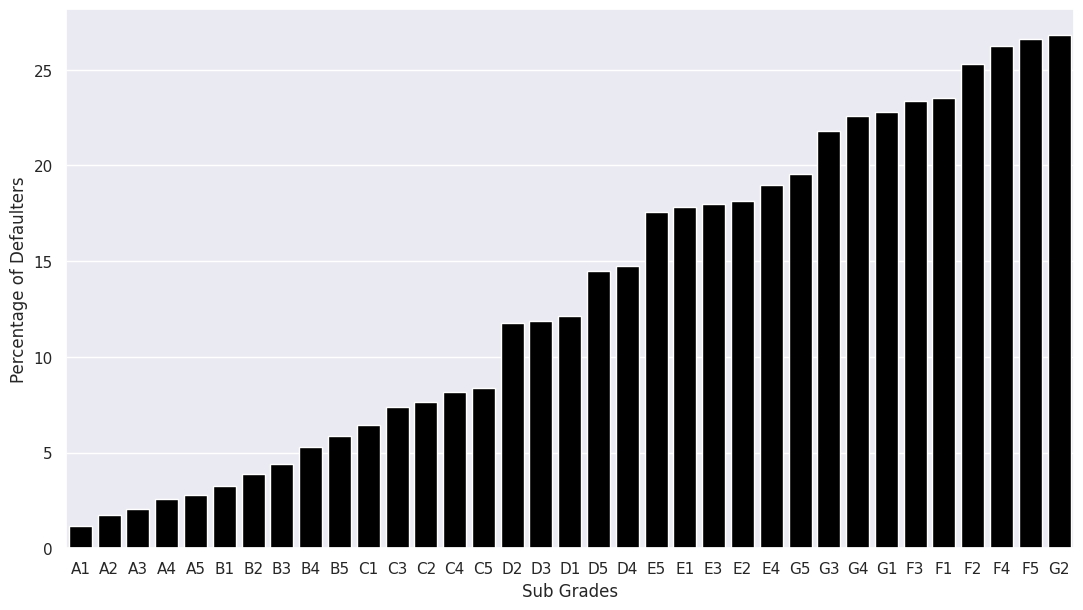

In [21]:
g = sns.barplot(x=0, y='index', data=final, color='black')
g.set(xlabel='Sub Grades', ylabel='Percentage of Defaulters')

In [22]:
lc_home = lc_data.groupby(['home_ownership', 'loan_default']).count()
lc_home = lc_home[['loan_status']]
lc_home

loan_status
home_ownership loan_default             
ANY            default                27
               paid                  477
MORTGAGE       default             23331
               paid               348248
NONE           paid                    4
OWN            default              7030
               paid                83121
RENT           default             26075
               paid               271025

In [23]:
lc_home = lc_home.drop(axis=0, labels=['ANY', 'NONE'])
lc_home

loan_status
home_ownership loan_default             
MORTGAGE       default             23331
               paid               348248
OWN            default              7030
               paid                83121
RENT           default             26075
               paid               271025

In [24]:
lc_home1 = lc_home.reset_index(level='loan_default')
lc_home1 = lc_home1.astype({'loan_status':'int'})
lc_home1

,loan_default,loan_status
home_ownership,,
MORTGAGE,default,23331
MORTGAGE,paid,348248
OWN,default,7030
OWN,paid,83121
RENT,default,26075
RENT,paid,271025


In [25]:
percentage1 = []
i = 0

while i <= (lc_home1.shape[0] - 1):
  percentage1.append((lc_home1.iloc[i][1] / (lc_home1.iloc[i][1] + lc_home1.iloc[i+1][1])) * 100)
  i += 2

percentage1

[6.278880130470236, 7.7980277534359015, 8.776506226859643]

[Text(0, 0.5, 'Percentage of Defaulters')]

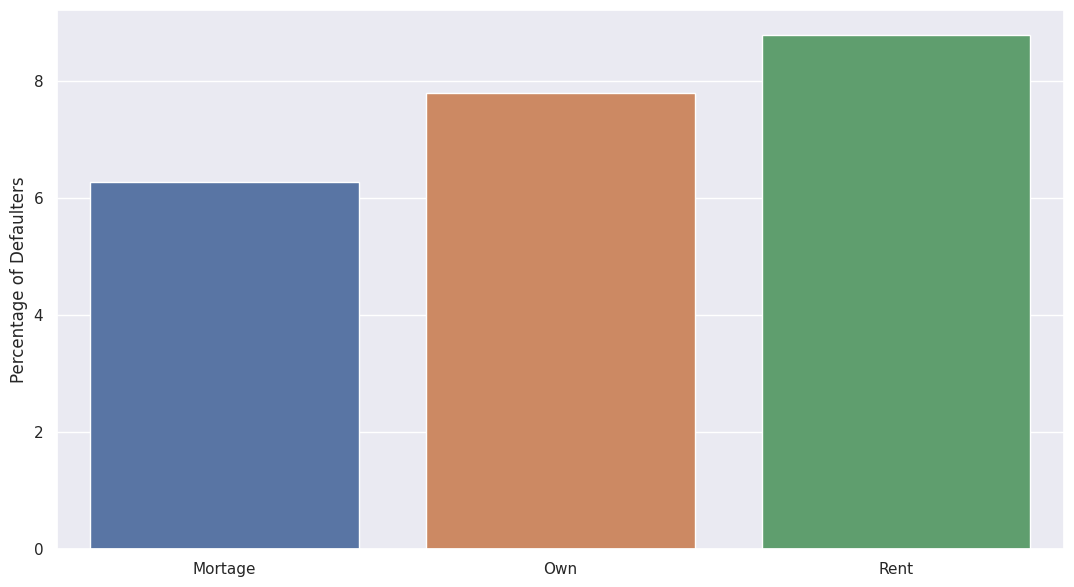

In [26]:
home = ['Mortage', 'Own', 'Rent']
g1 = sns.barplot(x=home, y=percentage1)
g1.set(ylabel='Percentage of Defaulters')

In [27]:
lc_mod3 = lc_data.groupby(['zip_code', 'loan_default']).count().reset_index(level='loan_default')
lc_mod3 = lc_mod3[['loan_default', 'loan_status']]
lc_mod3.to_csv("zip1.csv")

<Axes: xlabel='loan_default', ylabel='annual_inc'>

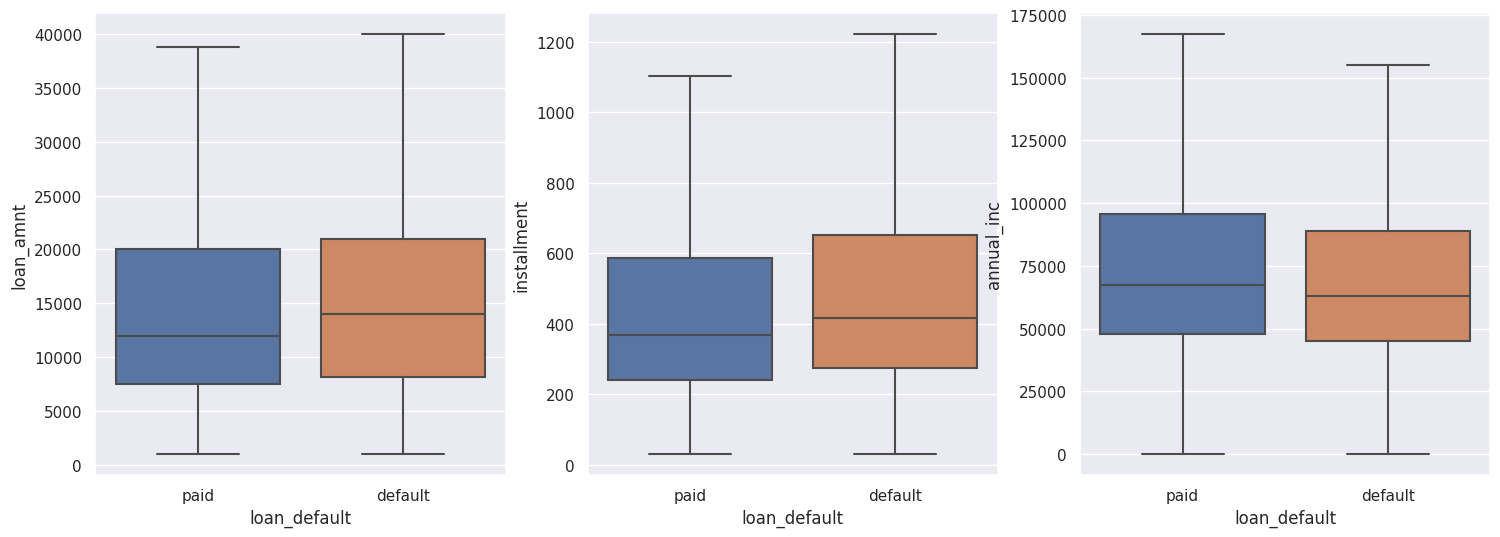

In [28]:
#Visualize Relationships between different candidate variables and Target variable 
#Since the target variable is a Categorical variable we will use box plots to visualize to compare with numerical variables
sns.set(rc={'figure.figsize':(18, 6)})
fig, axs = plt.subplots(ncols=3)

#1. Loan Amount v/s Loan Default
sns.boxplot(x="loan_default", y="loan_amnt", showfliers = False, data=lc_data,ax=axs[0])

#2. Loan Installment v/s Loan Default
sns.boxplot(x="loan_default", y="installment", showfliers = False, data=lc_data, ax=axs[1])

#3. Annual Income v/s Loan Default
sns.boxplot(x="loan_default", y="annual_inc", showfliers = False, data=lc_data, ax=axs[2])

<ipython-input-29-1ce66a106b62>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lc_data.corr(), annot=True, cmap='viridis')


<Axes: >

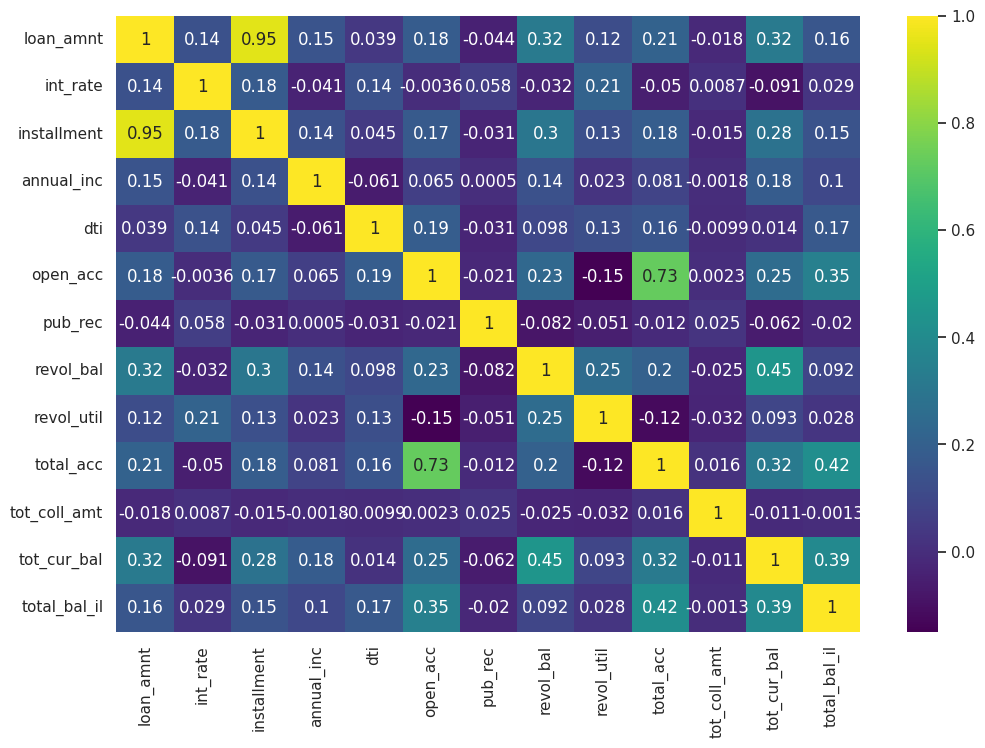

In [29]:
# Correlation Heatmap - We have used this for feature selection in the model building stage.  
plt.figure(figsize=(12, 8))
sns.heatmap(lc_data.corr(), annot=True, cmap='viridis')

In [33]:
lc_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,tot_coll_amt,tot_cur_bal,total_bal_il,loan_default
0,2300,36 months,12.62,77.08,C,C1,Unknown,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,credit_card,Credit card refinancing,148xx,21.61,4,0,3911.0,55.1,6,Individual,0.0,3911.0,0.0,paid
1,16000,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,debt_consolidation,Debt consolidation,021xx,25.61,9,0,33752.0,105.8,26,Individual,0.0,234457.0,11078.0,paid
2,6025,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-2017,Current,home_improvement,Home improvement,018xx,8.88,11,0,12425.0,44.9,27,Individual,0.0,121311.0,0.0,paid
3,20400,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-2017,Current,car,Car financing,913xx,27.06,15,0,8769.0,18.7,19,Individual,0.0,62335.0,53566.0,paid
4,13000,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-2017,Current,debt_consolidation,Debt consolidation,560xx,6.79,5,0,6866.0,88.0,24,Individual,0.0,15332.0,8466.0,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,6000,36 months,7.89,187.72,A,A5,Warehouse Clerk,< 1 year,OWN,38000.0,Source Verified,Jan-2016,Current,credit_card,Credit card refinancing,432xx,12.35,10,0,7867.0,36.8,14,Individual,0.0,9223.0,NaN,paid
759334,6000,36 months,9.17,191.28,B,B2,Unknown,NaN,RENT,32640.0,Not Verified,Jan-2016,Current,debt_consolidation,Debt consolidation,600xx,22.76,9,1,6898.0,37.1,17,Individual,0.0,30895.0,NaN,paid
759335,14400,60 months,13.18,328.98,C,C3,Meatcutter,10+ years,RENT,47000.0,Verified,Jan-2016,Late (16-30 days),credit_card,Credit card refinancing,531xx,19.64,7,0,10164.0,56.0,19,Individual,0.0,35979.0,NaN,default
759336,34050,36 months,15.41,1187.21,D,D1,Supervisor,10+ years,MORTGAGE,87800.0,Source Verified,Jan-2016,Current,credit_card,Credit card refinancing,212xx,12.10,14,0,25473.0,53.2,21,Individual,0.0,104560.0,NaN,paid


In [ ]:
lc_data.to_csv("new_data.csv")

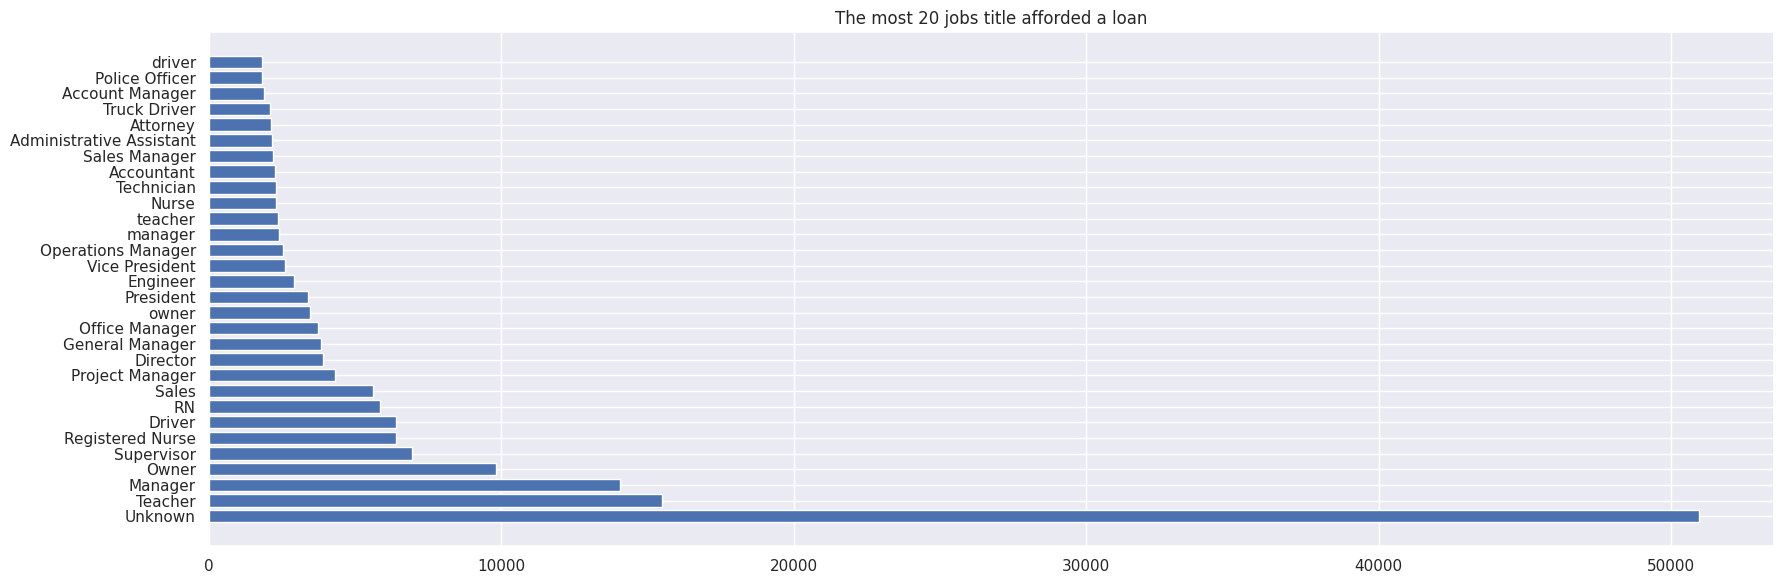

In [31]:
plt.barh(lc_data.emp_title.value_counts()[:30].index, lc_data.emp_title.value_counts()[:30])
plt.title("The most 20 jobs title afforded a loan")
plt.tight_layout()

## Visualizations implemented in R 

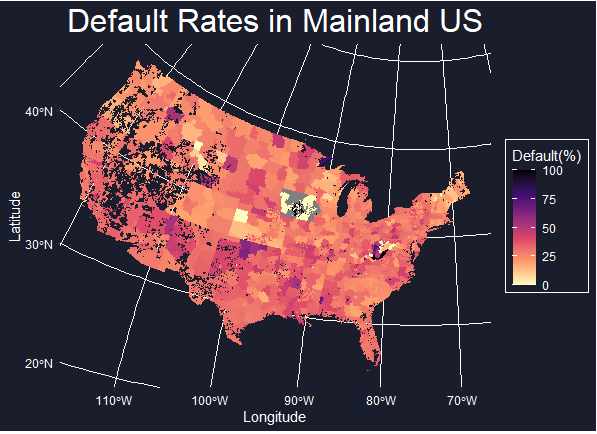

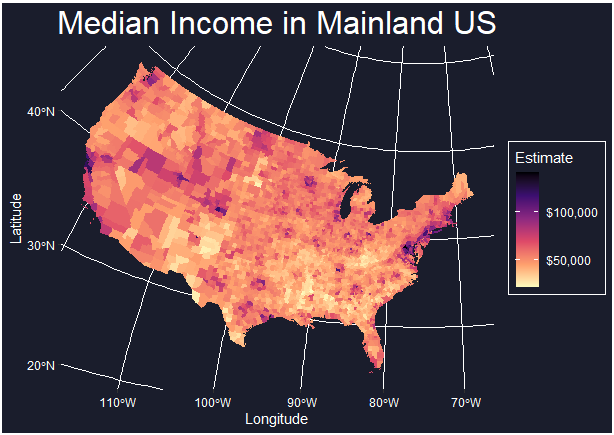

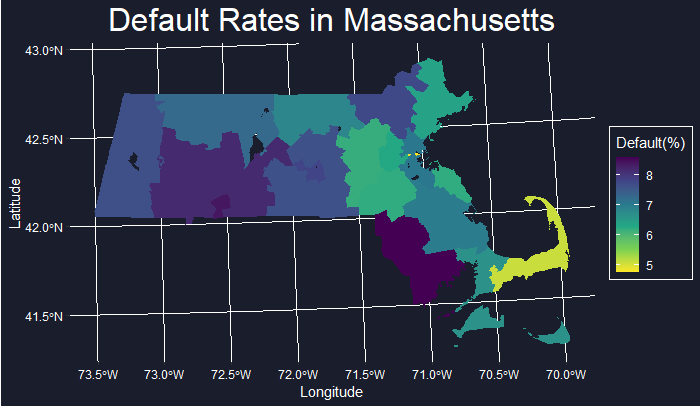

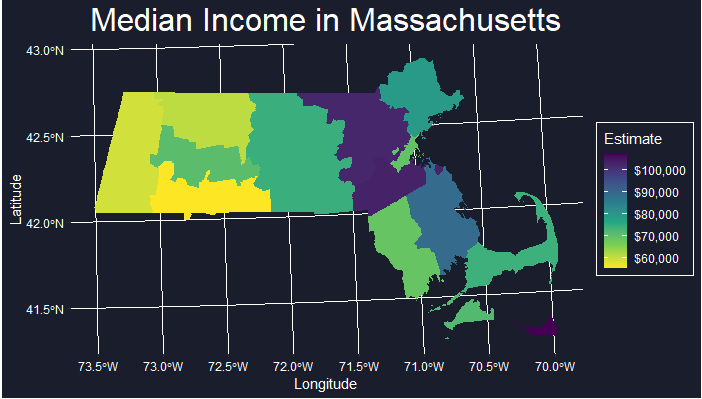

R code

In [ ]:
library(tidycensus)
library(tidyverse)
library(sf)
library(dplyr)
options(tigris_use_cache = TRUE)

census_api_key("", install = TRUE, overwrite = TRUE)
# First time, reload your environment so you can use the key without restarting R.
readRenviron("~/.Renviron")
# You can check it with:
Sys.getenv("CENSUS_API_KEY")

total_pop <- c("B01001_001")

states <- c("AL","AZ","AR","CA","CO","CT","DE","DC","FL","GA","ID","IL","IN",
            "IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV",
            "NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT",
            "VT","VA","WA","WV","WI","WY")

ma_pop <- get_acs( state="MA",geography = "zcta",
                   variables =total_pop,
                   geometry = T)

us_pop <- get_acs( state=states,geography = "zcta",
                   variables =total_pop,
                   geometry = T)

setwd("G:/NEU_DS/Capstone/phase2/")
zip <- read.csv("zip1.csv")


zip_tidy <- zip %>% pivot_wider(names_from = loan_default, values_from = loan_status) %>% 
  mutate_all(~replace(., is.na(.), 0)) %>%
  mutate(id=substr(zip_code,1,3),default_pct=(default/(paid+default))*100)

#Scale Default Rates to 25% 

zip_scale <- zip_tidy %>% mutate(scale_default=case_when((default_pct/25) >1 ~ 100,
                                            TRUE ~ default_pct*100/25))

us_scale <- merge(x=us_pop_zip,y=zip_scale,by="id",all.x=TRUE)

colnames(us_scale)[11] <- "Default(%)"

ma_pop_zip <- ma_pop %>% mutate(id=substr(GEOID,1,3))

us_pop_zip <- us_pop%>% mutate(id=substr(GEOID,1,3))

mass_combined <-merge(x=ma_pop_zip,y=zip_tidy,by="id",all.x=TRUE)

us_combined <- merge(x=us_pop_zip,y=zip_tidy,by="id",all.x=TRUE)

plot4 <- us_scale %>% ggplot(aes(fill = `Default(%)`)) +
  geom_sf(color = NA) + coord_sf(crs = 26918) + 
  scale_fill_viridis_c(option="magma",direction=-1)+
  theme(legend.position = 'right')+
  labs(title = "Default Rates in Mainland US", y = "Latitude", x = "Longitude")+
  theme(
    text=element_text(family="Gerbera"),
    plot.title = element_text(size = 24,hjust = 0.5,colour = "white",family="Gerbera-Bold"),
    plot.subtitle = element_text(size = 14,hjust=0.5,colour = "white"),
    axis.text = element_text(colour = "white"),
    axis.title = element_text(colour = "white"),
    legend.text = element_text(colour = "white"),
    legend.title = element_text(colour = "white"),
    panel.background = element_rect(fill = '#1a1d2c'),
    plot.background = element_rect(fill='#1a1d2c',colour = "white"),
    legend.background = element_rect(fill='#1a1d2c',colour = "white")) 

us_acs <- get_acs(state = states, geography = "county", variables = 'B19013_001',
                    geometry = T)

colnames(us_acs)[4] <- "Estimate"

plot3 <- us_acs %>% ggplot(aes(fill = Estimate)) +
  geom_sf(color = NA) + coord_sf(crs = 26918) + 
  scale_fill_viridis_c(option="magma",direction=-1,label = scales::dollar)+
  theme(legend.position = 'right')+
  labs(title = "Median Income in Mainland US", y = "Latitude", x = "Longitude")+
  theme(
    text=element_text(family="Gerbera"),
    plot.title = element_text(size = 24,hjust = 0.5,colour = "white",family="Gerbera-Bold"),
    plot.subtitle = element_text(size = 14,hjust=0.5,colour = "white"),
    axis.text = element_text(colour = "white"),
    axis.title = element_text(colour = "white"),
    legend.text = element_text(colour = "white"),
    legend.title = element_text(colour = "white"),
    panel.background = element_rect(fill = '#1a1d2c'),
    plot.background = element_rect(fill='#1a1d2c',colour = "white"),
    legend.background = element_rect(fill='#1a1d2c',colour = "white")) 

require(gridExtra)
grid.arrange(plot3, plot4, ncol=2)

####################################################################################

colnames(mass_combined)[10] <- "Default(%)"

plot2 <- mass_combined %>% ggplot(aes(fill = `Default(%)`)) +
  geom_sf(color = NA) + coord_sf(crs = 26918) + 
  scale_fill_viridis_c(direction=-1)+
  theme(legend.position = 'right')+
  labs(title = "Default Rates in Massachusetts", y = "Latitude", x = "Longitude")+
  theme(
    text=element_text(family="Gerbera"),
    plot.title = element_text(size = 24,hjust = 0.5,colour = "white",family="Gerbera-Bold"),
    plot.subtitle = element_text(size = 14,hjust=0.5,colour = "white"),
    axis.text = element_text(colour = "white"),
    axis.title = element_text(colour = "white"),
    legend.text = element_text(colour = "white"),
    legend.title = element_text(colour = "white"),
    panel.background = element_rect(fill = '#1a1d2c'),
    plot.background = element_rect(fill='#1a1d2c',colour = "white"),
    legend.background = element_rect(fill='#1a1d2c',colour = "white")) 


###Get Median Income Data)
mass_acs <- get_acs(state = "MA", geography = "county", variables = 'B19013_001',
                    geometry = T)

colnames(mass_acs)[4] <- "Estimate"


plot1 <- mass_acs %>% ggplot(aes(fill = Estimate)) +
  geom_sf(color = NA) + coord_sf(crs = 26918) + 
  scale_fill_viridis_c(direction=-1,label = scales::dollar)+
  theme(legend.position = 'right')+
  labs(title = "Median Income in Massachusetts", y = "Latitude", x = "Longitude")+
  theme(
    text=element_text(family="Gerbera"),
    plot.title = element_text(size = 24,hjust = 0.5,colour = "white",family="Gerbera-Bold"),
    plot.subtitle = element_text(size = 14,hjust=0.5,colour = "white"),
    axis.text = element_text(colour = "white"),
    axis.title = element_text(colour = "white"),
    legend.text = element_text(colour = "white"),
    legend.title = element_text(colour = "white"),
    panel.background = element_rect(fill = '#1a1d2c'),
    plot.background = element_rect(fill='#1a1d2c',colour = "white"),
    legend.background = element_rect(fill='#1a1d2c',colour = "white")) 

require(gridExtra)
grid.arrange(plot1, plot2, ncol=2)

#Density Plot
d <- density(zip_tidy$default_pct)
plot(d, type="n", main="Default rates by Zip Code",xlim=c(0,30))
polygon(d, col="dodgerblue", border="darkgray")
rug(zip_tidy$default_pct, col="red")


zip_tidy %>% ggplot(aes(x = default_pct)) + geom_density(aes(fill = 'default_pct')) +
  xlim(0,25)